In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [17]:

dt1 = pd.read_csv('D:\\DemoPy\\Mental Health Effects\\Data\\dataset1.csv')
dt2 = pd.read_csv('D:\\DemoPy\\Mental Health Effects\\Data\\dataset2.csv')

dt1.head()

In [19]:
dt2.head()

,ID,C_we,C_wk,G_we,G_wk,S_we,S_wk,T_we,T_wk
0,1000002,0.5,0.5,0.0,0.0,1.0,0.5,1.0,0.5
1,1000003,1.0,0.5,0.0,0.0,2.0,2.0,3.0,2.0
2,1000004,3.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0
3,1000005,4.0,2.0,0.0,0.0,4.0,3.0,7.0,5.0
4,1000006,1.0,0.5,0.0,0.0,2.0,2.0,1.0,0.5


In [9]:
join_dataset = pd.merge(dt1, dt2, on='ID', how='inner')
dataset21 = join_dataset.sort_values(by='ID',ascending = True)

dataset21.to_csv('D:\\DemoPy\\Mental Health Effects\\Data\\dataset21.csv', index=False)

dataset21.head()


,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,T_we,T_wk
3732,1000002,0,1,0,0.5,0.5,0.0,0.0,1.0,0.5,1.0,0.5
20507,1000003,0,0,1,1.0,0.5,0.0,0.0,2.0,2.0,3.0,2.0
20508,1000004,0,0,1,3.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0
26204,1000005,0,0,1,4.0,2.0,0.0,0.0,4.0,3.0,7.0,5.0
20509,1000006,0,0,1,1.0,0.5,0.0,0.0,2.0,2.0,1.0,0.5


In [31]:
# Now let's calculate the total computer and game usage by gender (0: female, 1: male)
# Sum the computer and game usage on weekdays and weekends for each gender
total_usage_by_gender = dataset21.groupby('gender')[['C_wk', 'C_we', 'G_wk', 'G_we']].sum()

total_usage_by_gender

,C_wk,C_we,G_wk,G_we
gender,,,,
0,111163.5,135920.5,19921.5,37818.0
1,89352.0,112209.5,94920.5,159328.0


In [67]:
# Merging the provided code to calculate total usage, frequency, mean, and difference, and then combine them into one table

# Calculate the mean usage for computer and game based on gender
gender_usage_mean = dataset21.groupby('gender')[['C_wk', 'C_we', 'G_wk', 'G_we']].mean()

# Calculate total usage by gender for computer and game on weekdays and weekends
total_usage_by_gender = dataset21.groupby('gender')[['C_wk', 'C_we', 'G_wk', 'G_we']].sum()

# Calculate the frequency (count) of users based on gender for computer and game usage
count_computer_game_by_gender = dataset21.groupby('gender')[['C_wk', 'C_we', 'G_wk', 'G_we']].count()

# Calculate the difference in mean usage between males and females (rounded to 2 decimal places)
computer_weekend_diff = round(gender_usage_mean.loc[1, 'C_we'] - gender_usage_mean.loc[0, 'C_we'], 2)
computer_weekday_diff = round(gender_usage_mean.loc[1, 'C_wk'] - gender_usage_mean.loc[0, 'C_wk'], 2)
game_weekend_diff = round(gender_usage_mean.loc[1, 'G_we'] - gender_usage_mean.loc[0, 'G_we'], 2)
game_weekday_diff = round(gender_usage_mean.loc[1, 'G_wk'] - gender_usage_mean.loc[0, 'G_wk'], 2)

# Combine the total usage, mean, difference, and frequency information into one table
data = {
    'Device Type': ['Computer (Weekend)', 'Computer (Weekday)', 'Game (Weekend)', 'Game (Weekday)'],
    'Mean Usage (Female)': 
        [gender_usage_mean.loc[0, 'C_we'], 
        gender_usage_mean.loc[0, 'C_wk'], 
        gender_usage_mean.loc[0, 'G_we'], 
        gender_usage_mean.loc[0, 'G_wk']],
    'Mean Usage (Male)': 
        [gender_usage_mean.loc[1, 'C_we'], 
        gender_usage_mean.loc[1, 'C_wk'], 
        gender_usage_mean.loc[1, 'G_we'], 
        gender_usage_mean.loc[1, 'G_wk']],
    'Difference (Male - Female)': 
        [computer_weekend_diff, 
        computer_weekday_diff, 
        game_weekend_diff, 
        game_weekday_diff],
    'Frequency (Female)': 
        [count_computer_game_by_gender.loc[0, 'C_we'], 
         count_computer_game_by_gender.loc[0, 'C_wk'], 
         count_computer_game_by_gender.loc[0, 'G_we'], 
         count_computer_game_by_gender.loc[0, 'G_wk']],
    'Frequency (Male)': 
        [count_computer_game_by_gender.loc[1, 'C_we'], 
         count_computer_game_by_gender.loc[1, 'C_wk'], 
         count_computer_game_by_gender.loc[1, 'G_we'], 
         count_computer_game_by_gender.loc[1, 'G_wk']],
    'Total Usage (Female)': 
        [total_usage_by_gender.loc[0, 'C_we'], 
         total_usage_by_gender.loc[0, 'C_wk'], 
         total_usage_by_gender.loc[0, 'G_we'], 
         total_usage_by_gender.loc[0, 'G_wk']],
    'Total Usage (Male)': 
        [total_usage_by_gender.loc[1, 'C_we'], 
         total_usage_by_gender.loc[1, 'C_wk'], 
         total_usage_by_gender.loc[1, 'G_we'], 
         total_usage_by_gender.loc[1, 'G_wk']],
}

# Create a DataFrame for the combined analysis
full_analysis_df = pd.DataFrame(data)

full_analysis_df


,Device Type,Mean Usage (Female),Mean Usage (Male),Difference (Male - Female),Frequency (Female),Frequency (Male),Total Usage (Female),Total Usage (Male)
0,Computer (Weekend),2.286876,2.080882,-0.21,59435,53924,135920.5,112209.5
1,Computer (Weekday),1.870337,1.656999,-0.21,59435,53924,111163.5,89352.0
2,Game (Weekend),0.636292,2.954677,2.32,59435,53924,37818.0,159328.0
3,Game (Weekday),0.335181,1.760264,1.43,59435,53924,19921.5,94920.5


## Barchart for the total spent time on the computer and games by the 2 genders

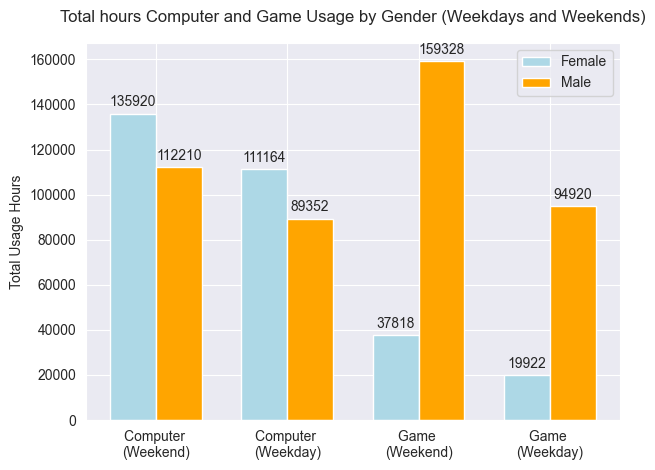

In [68]:

# Set up the data for plotting
categories = ['Computer \n(Weekend)', 'Computer \n(Weekday)', 'Game \n(Weekend)', 'Game \n(Weekday)']
female_totals = full_analysis_df['Total Usage (Female)']
male_totals = full_analysis_df['Total Usage (Male)']

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
bars_female = ax.bar(x - width/2, female_totals, width, label='Female', color='lightblue')
bars_male = ax.bar(x + width/2, male_totals, width, label='Male', color='orange')

# Add labels, title and custom x-axis tick labels
ax.set_ylabel('Total Usage Hours')
ax.set_title('Total hours Computer and Game Usage by Gender (Weekdays and Weekends)', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add bar labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',  # Text label
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position
                    xytext=(0, 3),  # Vertical offset
                    textcoords="offset points",  # Positioning relative to the bar
                    ha='center', va='bottom')

# Call the function to label both sets of bars
add_labels(bars_female)
add_labels(bars_male)

# Show the plot
plt.tight_layout()
plt.show()


## Bar chart for genders spend mean time for Computer and Game.

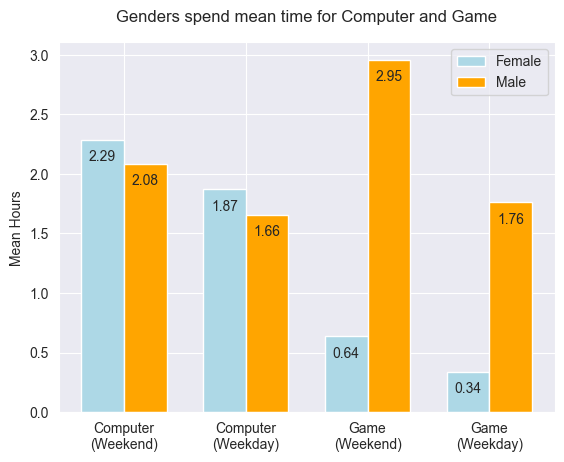

In [69]:


# Set up the data for plotting
categories = ['Computer\n(Weekend)', 'Computer\n(Weekday)', 'Game\n(Weekend)', 'Game\n(Weekday)']
female_means = gender_usage_mean.loc[0, ['C_we', 'C_wk', 'G_we', 'G_wk']]
male_means = gender_usage_mean.loc[1, ['C_we', 'C_wk', 'G_we', 'G_wk']]

# Create the bar chart
x = range(len(categories))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x, female_means, width, label='Female', color='lightblue')
bars2 = ax.bar([i + width for i in x], male_means, width, label='Male', color='orange')

# Add labels and title
ax.set_ylabel('Mean Hours')
ax.set_title('Genders spend mean time for Computer and Game', pad=15)
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(categories)
ax.legend()

# Add mean hour values on top of the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.2, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.2, round(yval, 2), ha='center', va='bottom')

# Display the chart
plt.show()
